 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
file = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(file, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_file = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_file, index_col= "Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [66]:
# Drop nulls
algo_reutrns_clean = algo_returns.dropna ()


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [67]:
# Reading S&P 500 Closing Prices
sp500_history_file = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_file, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [12]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [19]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

<ipython-input-19-6fbf7e809fae>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')


In [14]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.astype(float).pct_change()
daily_returns_sp500.sort_index()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
sp500_history_clean = sp500_history.dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500 = daily_returns_sp500.rename(columns={
    "Close": "S&P 500",})
daily_returns_sp500.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, daily_returns_sp500], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

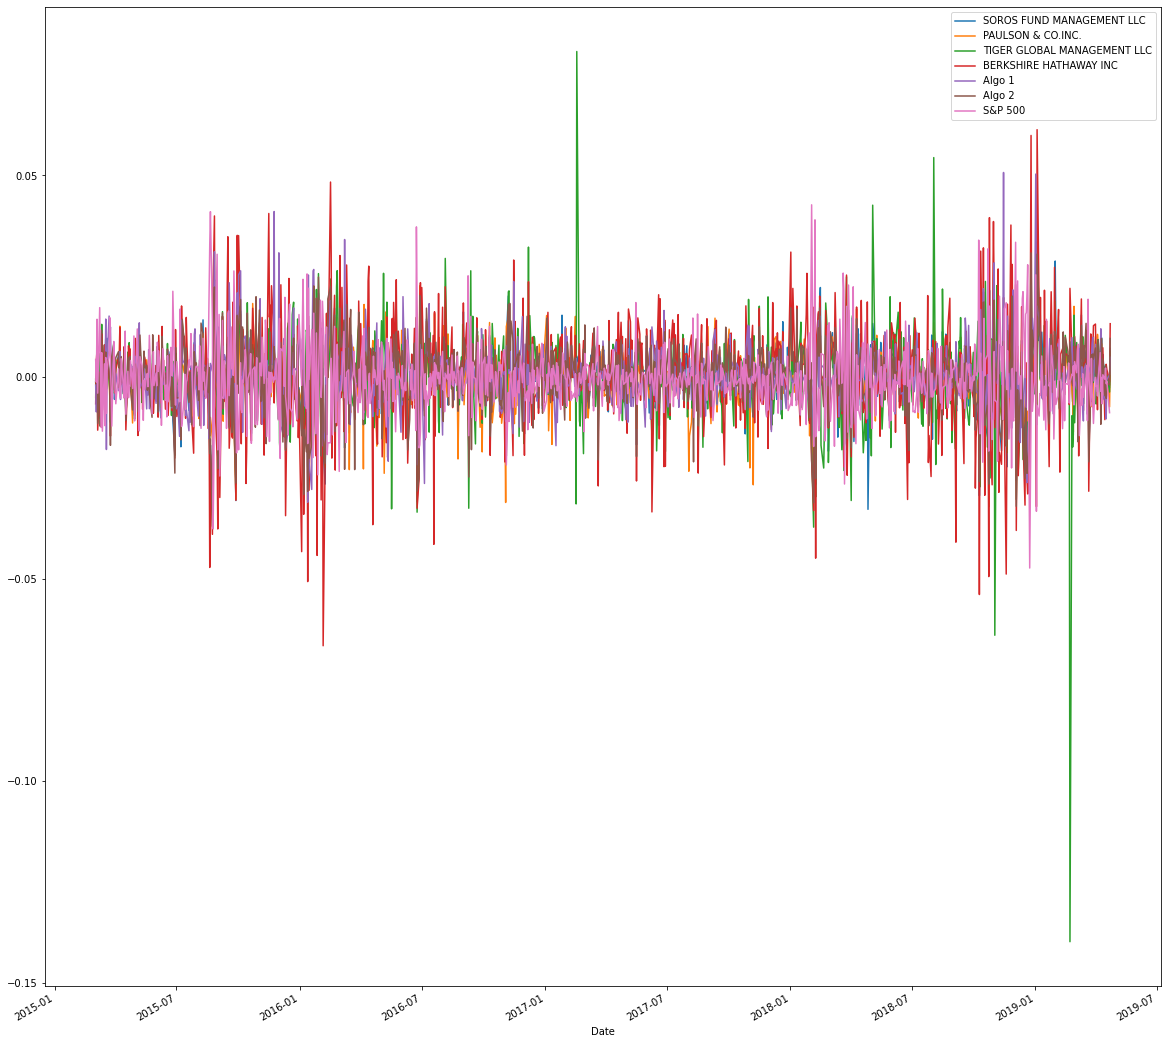

In [22]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20, 20))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

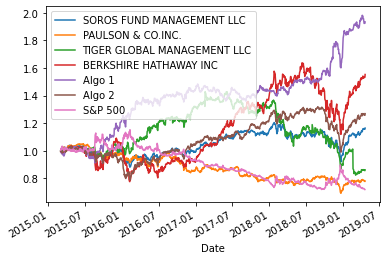

In [23]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

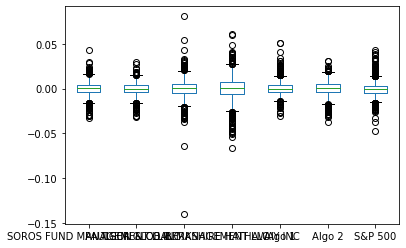

In [25]:
# Box plot to visually show risk
combined_df.plot(kind="box")

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios

std_df = pd.DataFrame(combined_df.std() , columns = ['STD'])
std_df.head(10)

,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008587


### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500
combined_df["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
std_df['STD'] > combined_df['S&P 500'].std()


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
Name: STD, dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

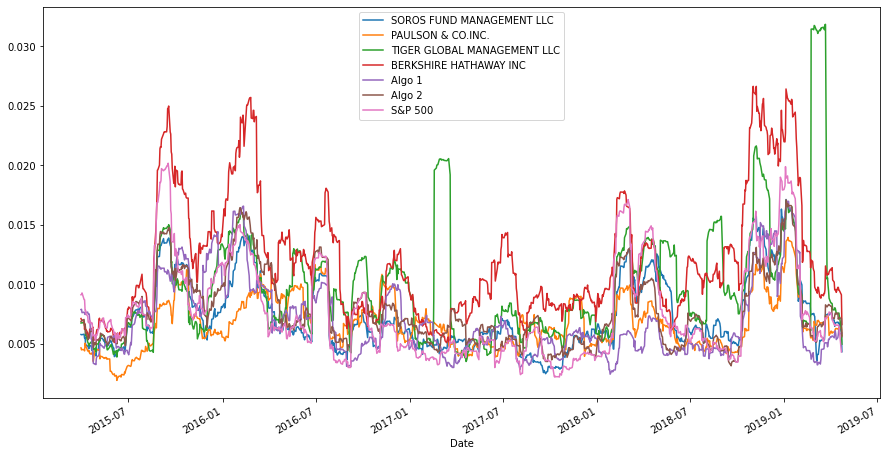

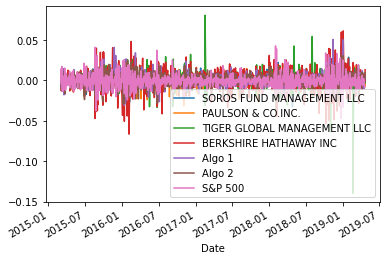

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(15,8))
# Plot the rolling standard deviation
combined_df.plot()

### Calculate and plot the correlation

<AxesSubplot:>

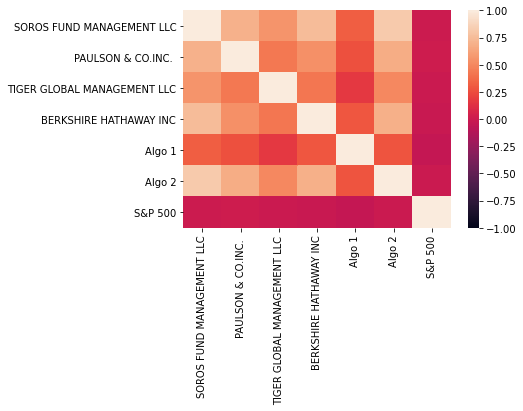

In [60]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1,)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

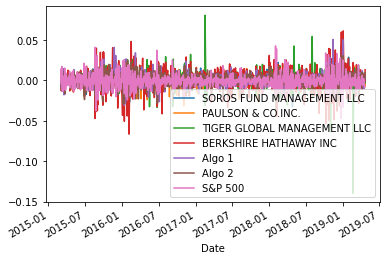

In [68]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
covariance = combined_df['S&P 500'].var()
# Calculate variance of S&P 500
variance = combined_df['S&P 500'].var()
variance
# Computing beta
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
covariance
# Plot beta trend
combined_df.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [1]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=10,10)


SyntaxError: positional argument follows keyword argument (<ipython-input-1-83d448a554f5>, line 2)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

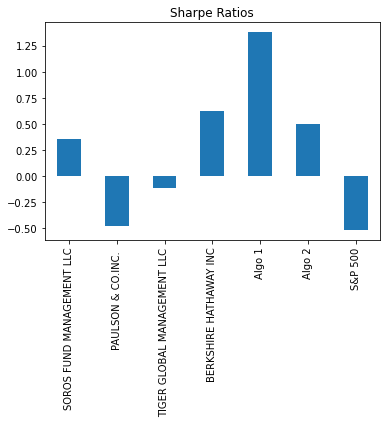

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [1]:
# Reading data from 1st stock
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

NameError: name 'Path' is not defined

In [5]:
# Reading data from 2nd stock
aapl_csv = Path(".\Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)

NameError: name 'Path' is not defined

In [6]:
# Reading data from 3rd stock
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "Cost","NOCP":"Cost"},inplace = True )
cost_df.drop(columns=['Cost'], axis=1, inplace = True)

NameError: name 'Path' is not defined

In [7]:
# Combine all stocks in a single DataFrame

combined_pt2 = pd.concat([goog_df,aapl_df,cost_df], axis='columns', join='inner')
combined_pt2.head()




NameError: name 'pd' is not defined

In [64]:
# Reset Date index
combined_pt2.sort_index(inplace=True)
combined_pt2.head()

,GOOG,AAPL
Trade DATE,,
2018-05-11,1098.26,188.59
2018-05-14,1100.20,188.15
2018-05-15,1079.23,186.44
2018-05-16,1081.77,188.18
2018-05-17,1078.59,186.99


In [83]:
# Reorganize portfolio data by having a column per symbol
combined_pt2.sort_index(inplace=True)
combined_pt2.head()

,GOOG,AAPL
Trade DATE,,
2018-05-11,1098.26,188.59
2018-05-14,1100.20,188.15
2018-05-15,1079.23,186.44
2018-05-16,1081.77,188.18
2018-05-17,1078.59,186.99


In [95]:
# Calculate daily returns
daily_returns_combined_pt2= combined_pt2.astype(float).pct_change()
daily_returns_combined_pt2.sort_index()
daily_returns_combined_pt2.head()
# Drop NAs
combined_pt2 = combined_pt2.dropna()
# Display sample data
print(combined_pt2)

               GOOG    AAPL
Trade DATE                 
2018-05-11  1098.26  188.59
2018-05-14  1100.20  188.15
2018-05-15  1079.23  186.44
2018-05-16  1081.77  188.18
2018-05-17  1078.59  186.99
...             ...     ...
2019-05-03  1185.40  211.75
2019-05-06  1189.39  208.48
2019-05-07  1174.10  202.86
2019-05-08  1166.27  202.90
2019-05-09  1162.38  200.72

[250 rows x 2 columns]


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [2]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns = combined_pt2.dot(weights)

# Calculate portfolio return
custom = pd.DataFrame(portfolio_returns)
custom.head()
# Display sample data
print(portfolio_returns)

NameError: name 'combined_pt2' is not defined

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [4]:
# Join your returns DataFrame to the original returns DataFrame
combined_pt3 = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.dropna(inplace=True)
combined_pt3.sort_index()
combined_pt3.head()

NameError: name 'pd' is not defined

In [1]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_pt3 = combined_pt3.dropna()

NameError: name 'combined_pt3' is not defined

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [93]:
# Calculate the annualized `std`
combined_pt3.std()

NameError: name 'combined_pt3' is not defined

### Calculate and plot rolling `std` with 21-day window

In [94]:
# Calculate rolling standard deviation
combined_pt3.rolling(window=21).std().plot(figsize=(15,8))
# Plot rolling standard deviation
combined_pt3.plot()

NameError: name 'combined_pt3' is not defined

### Calculate and plot the correlation

In [96]:
# Calculate and plot the correlation
correlation = combined_pt3.corr()
correlation

combined_pt3.plot()

NameError: name 'combined_pt3' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [99]:
# Calculate and plot Beta
combined_pt3.rolling(window=60) = combined_pt3.cov(combined_df['S&P 500'])
covariance


SyntaxError: cannot assign to function call (<ipython-input-99-d7d2038fe027>, line 2)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [97]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_pt3.mean() * 252) / (combined_pt3.std() * np.sqrt(252))
sharpe_ratios

NameError: name 'combined_pt3' is not defined

<AxesSubplot:title={'center':'Sharpe Ratios'}>

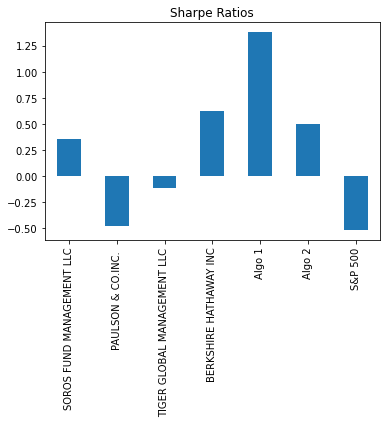

In [98]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
Making money. 